<a href="https://colab.research.google.com/github/kaispace30098/data-mapping-woot-and-shipstation/blob/main/Copy_of_Data_Mapping_Woot_%26_Shipstation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

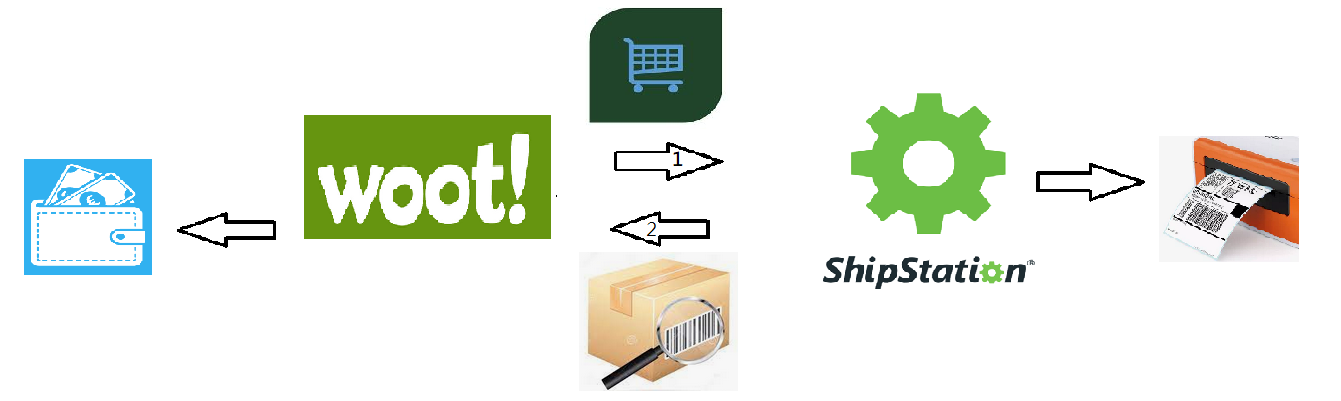

In [ ]:
#@title  1.Upload Woot's order sheet and get Shipstation's import sheet 
import pandas as pd
import io
from google.colab import files
import numpy as np

!pip install xlrd==2.0.1

def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d
uploaded = files.upload()
fileName = read_dir_file(0)
df1= pd.read_csv(io.BytesIO(uploaded[fileName]))

df2=pd.DataFrame({
    
    'Order Number': df1.OrderNumber.tolist(),
    'Order Created Date' : df1['OrderDate'].tolist(),
    'Order Date Paid' : "",
    'Order Total' :"",
    'Order Amount Paid' : "",
    'Order Tax Paid' : "",
    'Order Shipping Paid' :"",
    'Order Requested Shipping Service' : "Standard Shipping",
    'Order Total Weight (oz)' : 16,
    'Order Custom Field 1' : df1['CustomerOrderNumber'].tolist(),
    'Order Custom Field 2' : "",
    'Order Custom Field 3' : "",
    'Order Source' : "Woot's Customer",
    'Order Notes from Buyer' : "",
    'Order Notes to Buyer' : "",
    'Order Internal Notes' : "",
    'Order Gift Message' : "",
    'Order Gift - Flag' : "",
    'Buyer Full Name' : df1['Name'].tolist(),
    'Buyer First Name' :"",
    'Buyer Last Name' : "",
    'Buyer Email' : "",
    'Buyer Phone' : df1['Phone'].tolist(),
    'Buyer Username' : df1['Name'].tolist(),
    'Recipient Full Name' : df1['Name'].tolist(),
    'Recipient First Name' : "",
    'Recipient Last Name' : "",
    'Recipient Phone' : df1['Phone'].tolist(),
    'Recipient Company' : "",
    'Address Line 1' : df1['Address1'].tolist(),
    'Address Line 2' : df1['Address2'].tolist(),
    'Address Line 3' : "",
    'City' : df1['City'].tolist(),
    'State' : df1['State'].tolist(),
    'Postal Code' : df1['PostalCode'].tolist(),
    'Country Code' : df1['Country'].tolist(),
    'Item SKU' : df1['PartNumber'].tolist(),
    'Item Name' : df1['Description'].tolist(),
    'Item Quantity' : df1['Quantity'].tolist(),
    'Item Unit Price' : df1['Cost'].tolist(),
    'Item Weight (oz)' : 16,
    'Item Options' : "",
    'Item Warehouse Location' : "3000 E Chambers St, PHX AZ",
    'Item Marketplace ID' : ""

})

df2.to_csv('woot_shipstation.csv',index=False) 
files.download('woot_shipstation.csv')   


In [ ]:
#@title  2.Upload Shipstation shipment sheet and get Woot's import sheet 
import pandas as pd
import io
from google.colab import files
import numpy as np

!pip install xlrd==2.0.1

def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d
uploaded = files.upload()
fileName = read_dir_file(0)
df3= pd.read_csv(io.BytesIO(uploaded[fileName]))
df4=pd.DataFrame({
    'OrderNumber': df3['OrderNumber'].tolist(),
    'TrackingNumber': df3['TrackingNumber'].tolist(),
    'Quantity': df3['Quantity'].tolist(),
    'ShipDate': df3['ShipDate'].tolist(),
    'Carrier': df3['Carrier'].tolist(),
    'ShippingMethod': df3['ServiceCode'].tolist(),
})

df4.ShipDate=pd.to_datetime(df4.ShipDate).dt.date
df4.to_csv('shipstation_woot.csv',index=False) 
files.download('shipstation_woot.csv')   
